# Gridworld problem

The Gridworld problem in `RL` is a problem where we want to create an optimal strategy for an agent to traverse a grid. A grid is a square matrix of cells, and the agent can move in any of the four directions (up, down, left, right) in each cell. The agent receives a reward of -1 for each step it takes, and a reward of +10 if it reaches the goal cell.

In this example, there will be 5 goal cells: one in each corner and the in the center. The agent can start from any non goal squares and has to reach one of the goal cells. The agent can only move in the four directions, and cannot move diagonally.

In [1]:
# Importing the needed packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from typing import Tuple

In [2]:
def plot_matrix(M: np.array, img_width: int = 5, img_height: int = 5, title: str = None) -> None: 
    """
    Plots a matrix as an image.
    """
    height, width = M.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')
    
    for y in range(height):
        for x in range(width):
            ax.annotate(str(M[y][x]), xy=(x, height - y - 1), ha='center', va='center')

    offset = .5    
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)
    plt.show()

def plot_policy_matrix(P: dict, S:np.array, img_width: int = 5, img_height: int = 5, title: str = None) -> None: 
    """ 
    Plots the policy matrix out of the dictionary provided; The dictionary values are used to draw the arrows 
    """
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')
    for i in range(height):
        for j in range(width):
            # Adding the arrows to the plot
            if 'up' in P[S[i, j]]:
                plt.arrow(j, i, 0, -0.3, head_width = 0.05, head_length = 0.05)
            if 'down' in P[S[i, j]]:
                plt.arrow(j, i, 0, 0.3, head_width = 0.05, head_length = 0.05)
            if 'left' in P[S[i, j]]:
                plt.arrow(j, i, -0.3, 0, head_width = 0.05, head_length = 0.05)
            if 'right' in P[S[i, j]]:
                plt.arrow(j, i, 0.3, 0, head_width = 0.05, head_length = 0.05)

    offset = .5    
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)
    

# Matrices and sets used in an RL problem 

## Action set

The $\mathbb{A}$ set contains all the possible actions that the agent can take. In this case, the agent can move in any of the four directions, so the action set is $\mathbb{A} = \{up, down, left, right\}$ or $\mathbb{A} = \{\uparrow,  \downarrow, \leftarrow, \rightarrow\}$

##  Reward matrix 

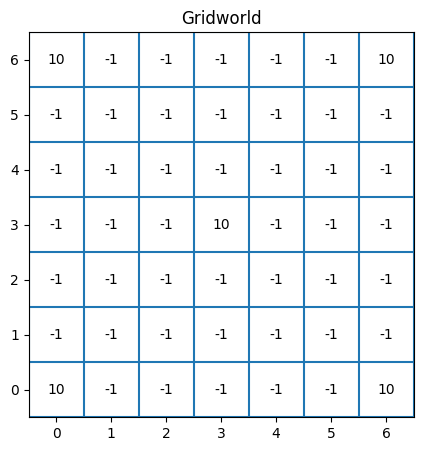

In [3]:
# Defining the number of blocks of a n x n grid 
n = 7

# Defining the value for the hole and the goal
goal = 10
step = -1

# Initiating an empty dataframe of size n x n
G = np.ones((n,n))

# Adding the goal values to the center and the corners
G[0, n-1] = goal
G[n-1, 0] = goal
G[0, 0] = goal
G[n-1, n-1] = goal
G[n // 2, n // 2] = goal

# Every other step is -1
G[G == 1] = step

# Converting the G matrix to int 
G = G.astype(int)

plot_matrix(G, title='Gridworld')

In the above diagram, the gridworld is represented as a `n` by `n` matrix. Each cell in it represent the reward you get when you transition to that state. We can call the above matrix as the `reward matrix` and denote it $\mathbb{G}$. Each element in the matrix is a real number: 

$\forall r \in \mathbb{G}, r \in \mathbb{R}$ 

## State matrix

Alongside the $\mathbb{G}$ matrix, we have the the state matrix $\mathbb{S}$.

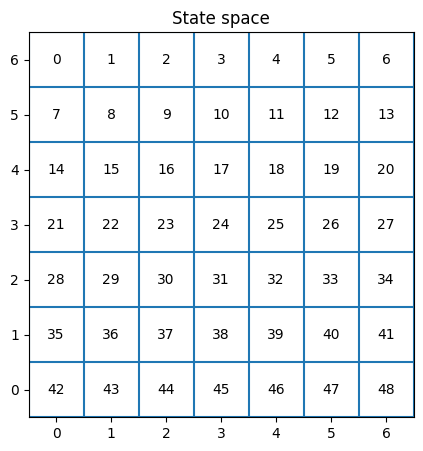

In [4]:
S = np.arange(0, n*n).reshape(n, n)

plot_matrix(S, title='State space')

The state matrix is just a matrix whose each element gives an index to the grid an agent is in. 

For simplicity sake, we in the algorithms and the calculations we tend to flatten these matrices and not keep track of the row and the column indices - just the state numbers. We can always go back to the plot above and check were a certain state is. 

## Policy matrix 

The policy matrix, denoted as $\mathbb{P}$ is a matrix whose each element is a probability of taking an action in a certain state. In each of the elements of the grid, the values are an array of all the possible actions an agent can take.  

In [5]:
# Saving all the unique states to a vector 
states = np.unique(S)

# Dictionary to hold each action for a given state
P = {}
for s in states: 
    s_dict = {}

    # Checking which index is the current state in the S matrix 
    s_index = np.where(S == s)

    # If the state is in the top left corner, we can only move right and down
    if s_index == (0, 0):
        s_dict['right'] = 0.5
        s_dict['down'] = 0.5
    
    # If the state is in the top right corner, we can only move left and down
    elif s_index == (0, n - 1):
        s_dict['left'] = 0.5
        s_dict['down'] = 0.5
    
    # If the state is in the bottom left corner, we can only move right and up
    elif s_index == (n - 1, 0):
        s_dict['right'] = 0.5
        s_dict['up'] = 0.5
    
    # If the state is in the bottom right corner, we can only move left and up
    elif s_index == (n - 1, n - 1):
        s_dict['left'] = 0.5
        s_dict['up'] = 0.5
    
    # If the state is in the first row, we can only move left, right, and down
    elif s_index[0] == 0:
        s_dict['left'] = 0.333
        s_dict['right'] = 0.333
        s_dict['down'] = 0.333
    
    # If the state is in the last row, we can only move left, right, and up
    elif s_index[0] == n - 1:
        s_dict['left'] =  0.333
        s_dict['right'] = 0.333
        s_dict['up'] = 0.333
    
    # If the state is in the first column, we can only move up, down, and right
    elif s_index[1] == 0:
        s_dict['up'] = 0.333
        s_dict['down'] = 0.333
        s_dict['right'] = 0.333
    
    # If the state is in the last column, we can only move up, down, and left
    elif s_index[1] == n - 1:
        s_dict['up'] = 0.333
        s_dict['down'] = 0.333
        s_dict['left'] = 0.333

    # If the state is in the middle, we can move in all directions
    else:
        s_dict['up'] = 0.25
        s_dict['down'] = 0.25
        s_dict['left'] = 0.25
        s_dict['right'] = 0.25

    # Saving the current states trasition probabilities
    P[s] = s_dict

print(f"Example of policy for state 0: {P[0]}")
print(f"Example of policy for state 1: {P[1]}")
print(f"Example of policy for state 23: {P[23]}")

Example of policy for state 0: {'right': 0.5, 'down': 0.5}
Example of policy for state 1: {'left': 0.333, 'right': 0.333, 'down': 0.333}
Example of policy for state 23: {'up': 0.25, 'down': 0.25, 'left': 0.25, 'right': 0.25}


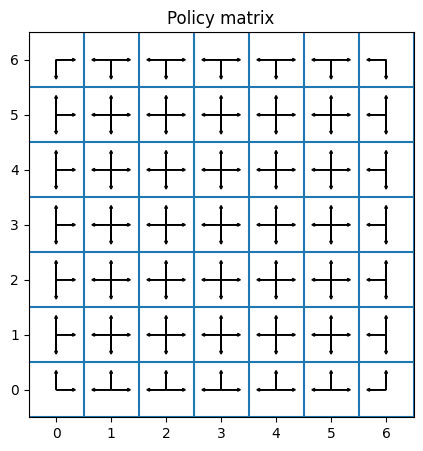

In [6]:
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take 
plot_policy_matrix(P, S, title='Policy matrix')

The above matrix shows the initial uniform policy - in each state, the probability of transition to any of the four directions is equal to the available actions.  

## Value matrix 

The value matrix is denoted as $\mathbb{V}$. The dimension of the matrix is the same as the state space. Each grid in the value matrix represents the total reward an agent can get if it starts from that state and follows the policy. 

$$v_{\pi} (s) = \mathbb{E}\left[G_{t} | S_{t} = s \right] $$

Where 

$G_{t}$ - total reward an agent gets after taking action `a` in state `s` and following the policy $\pi$ till the end of the episode. The equation for $G_{t}$ is given below.

$$G_{t} = \sum_{k = t + 1} ^ {K} \left[ \gamma^{k} R_{k + 1}\right]$$
 
$K$ - the number of steps in the episode.

$$v_{\pi} (s) = \sum_{a \in \mathbb{A}} \left[ \pi(a | s) \sum_{s^{'}, r} p(s^{'}, r | s, a) \left[ r + \gamma v_{\pi} (s^{'}) \right] \right] $$

This equation is called the Bellman equation.

Where, 

$\pi(a | s)$ is the probability of taking action `a` in state `s`

$p(s^{'}, r | s, a)$ is the probability of transitioning to state `s'` with reward `r` when taking action `a` in state `s`

$\gamma \in (0, 1)$ is the discount factor

$v_{\pi} (s)$ is the value of state `s` under policy $\pi$. 

$r$ - reward for taking action `a` in state `s`. 

The above equation is a recursive one and could go on forever. In practice, we use a finite number of iterations to calculate the value of each state. 

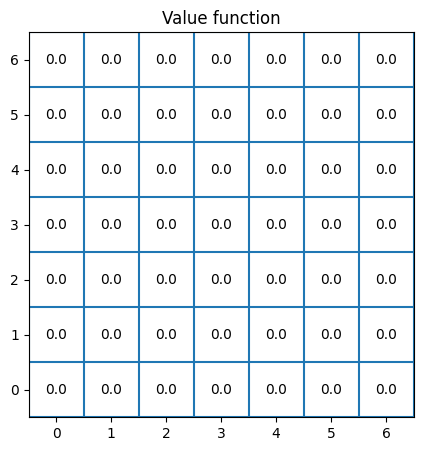

In [7]:
# Initiating the empty Value function 
V = np.zeros((n, n))

plot_matrix(V, title='Value function')

Because we have not started exploring anything, the value of each state is 0. 

## Bellman equation simplification for GridWorld 

After we take an action from any given state, we are guaranteed to get a reward and transition to a new state. Thus, the conditional probability of getting a reward and transitioning to a new state is 1.

We can simplify the Bellman equation as follows: 

$$v_{\pi} (s) = \sum_{a \in \mathbb{A}} \left[ \pi(a | s) \left[ r + \gamma v_{\pi} (s^{'}) \right] \right] $$

Here

$s^{'}$ - the state we transition to after taking action `a` in state `s` 

In [8]:
def get_next_state(a: str, s: int, S: np.array): 
    """ 
    Function that returns the next state's coordinates given an action and a state 
    """
    # Getting the current indexes 
    s_index = np.where(S == s)
    s_row = s_index[0][0]
    s_col = s_index[1][0]

    # Defining the indexes of the next state
    next_row = s_row 
    next_col = s_col

    if a == 'up':
        next_row = s_row - 1
        next_col = s_col
    elif a == 'down':
        next_row = s_row + 1
        next_col = s_col
    elif a == 'left':
        next_row = s_row
        next_col = s_col - 1
    elif a == 'right':
        next_row = s_row
        next_col = s_col + 1

    return next_row, next_col

In [9]:
def bellman_value(
    s: int, 
    a: str, 
    S: np.array, 
    P: np.array, 
    G: np.array, 
    V: np.array, 
    gamma: float = 0.9
    ) -> Tuple: 
    """
    Calculates the conditional probability of a given state and action of returning a reward and the given next state 
    """
    # Extracting all the available actions for the given state
    actions = P[s]

    # Extracting the indexes of the current state 
    s_index = np.where(S == s)
    s_row = s_index[0][0]
    s_col = s_index[1][0]

    # Placeholder to hold the sum 
    sum = 0
    for action in actions: 
        # Extracting the probability of the given action 
        prob = actions[action]

        # Getting the next states indexes
        next_row, next_col = get_next_state(action, s, S)

        # Extracting the expected reward 
        reward = G[next_row, next_col]

        # Extracting the value of the next state
        value_prime = V[next_row, next_col]

        # Adding to the sum 
        sum += prob * (reward + gamma * value_prime)

    return sum

In [10]:
print(f"Conditional probabilities sum of being in 1st state and going right: {bellman_value(1, 'right', S, P, G, V)}")
print(f"Conditional probabilities sum of being in 18th state and going down: {bellman_value(18, 'right', S, P, G, V)}")

Conditional probabilities sum of being in 1st state and going right: 2.6639999999999997
Conditional probabilities sum of being in 18th state and going down: -1.0


# Value iteration for optimal policy 

We will follow the bellow algorithm to find the best possible policy for the agent to follow.

![](media/chapter-4/value-iteration.png)

In [11]:
def find_best_action(
    s: int,  
    S: np.array, 
    P: np.array, 
    G: np.array, 
    V: np.array, 
    gamma: float = 0.9
    ) -> Tuple:
    """
    Finds the best action given a state

    Returns the best action the Bellman value  
    """ 
    # Extracting all the possible actions for the given state
    actions = P[s]

    # Initial maximum value 
    current_max = -np.inf

    # The best action is the first action in the dictionary 
    best_action = list(actions.keys())[0]

    # Iterating over the actions 
    for action in actions: 
        # Getting the Bellman's value 
        value = bellman_value(s, action, S, P, G, V, gamma) 

        if value > current_max: 
            current_max = value
            best_action = action

    return best_action, current_max

def value_iteration(
    S: np.array, 
    P: np.array, 
    G: np.array, 
    V: np.array, 
    gamma: float = 0.9, 
    epsilon: float = 0.0001
    ) -> None: 
    """
    Function that performs the value iteration algorithm

    The function updates the V matrix inplace 
    """
    # Iteration tracker 
    iteration = 0

    # Iterating until the difference between the value functions is less than epsilon 
    iterate = True
    while iterate: 
        # Placeholder for the maximum difference between the value functions 
        delta = 0
        
        # Updating the iteration tracker
        iteration += 1 
        # Iterating over the states 
        for s in S.flatten():
            
            # Getting the indexes of s in S 
            s_index = np.where(S == s)
            s_row = s_index[0][0]
            s_col = s_index[1][0]

            # Saving the current value for the state
            v_init = V[s_row, s_col].copy()

            # Getting the best action and the Bellman's value 
            best_action, bellman_value = find_best_action(s, S, P, G, V, gamma)

            # Updating the value function with a rounded value
            V[s_row, s_col] = np.round(bellman_value, 2)

            # Updating the delta 
            delta = np.max([delta, np.abs(V[s_row, s_col] - v_init)])

            if delta < epsilon: 
                iterate = False
                break

    # Printing the iteration tracker
    print(f"Converged in {iteration} iterations")

    return None

In [12]:
value_iteration(S, P, G, V, epsilon=10**-16)

Converged in 23 iterations


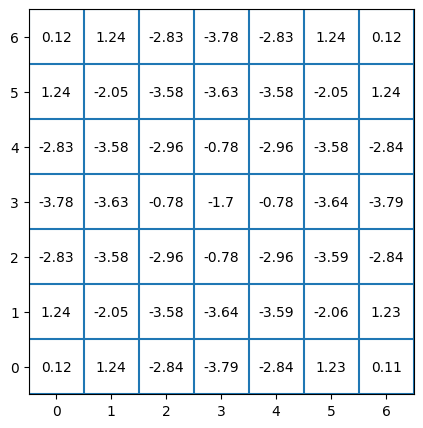

In [13]:
plot_matrix(V)

# Updating the policy matrix


In [14]:
def update_policy(S, P, V): 
    """
    Function that updates the policy given the value function 
    """
    # Iterating over the states 
    for s in S.flatten(): 
        # Listing all the actions 
        actions = P[s]

        # Getting the indexes of s in S
        s_index = np.where(S == s)
        s_row = s_index[0][0]
        s_col = s_index[1][0]

        # For each available action, getting the Bellman's value
        values = {}
        for action in actions.keys():
            # Getting the next state indexes
            next_row, next_col = get_next_state(action, s, S)

            # Saving the value function of that nex t state
            values[action] = V[next_row, next_col]
        
        # Extracting the maximum key value of the values dictionary 
        max_value = max(values.values())        

        # Leaving the keys that are equal to the maximum value
        best_actions = [key for key in values if values[key] == max_value]

        # Getting the length of the dictionary 
        length = len(values)

        # Creating the final dictionary with all the best actions in it 
        p_star = {}
        for action in best_actions:
            p_star[action] = 1/length

        # Updating the policy 
        P[s] = p_star

    return P

In [15]:
# Upating the policy 
P = update_policy(S, P, V)

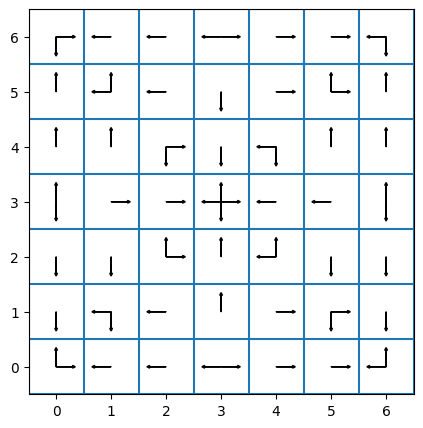

In [16]:
plot_policy_matrix(P, S) 

# More grid world examples

In [17]:
# Adding the GridWorld dir to the path
import sys
sys.path.append('../')

from GridWorld.GridWorld import GridWorld

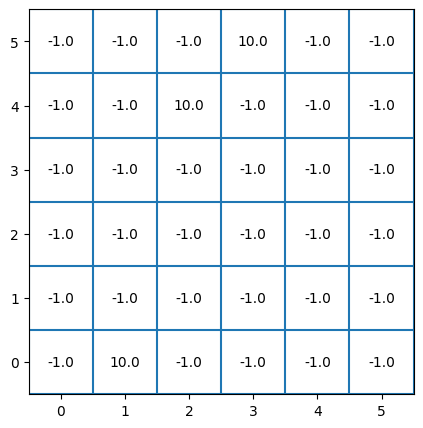

In [18]:
# Making a 6 by 6 grid 
grid = GridWorld(
    n=6, 
    goal_reward=10,
    step_reward=-1,
    gamma=0.9
    )

# Adding three random goals 
for _ in range(3):
    grid.add_random_goal()

# Ploting how the grid looks like
grid.plot_rewards()

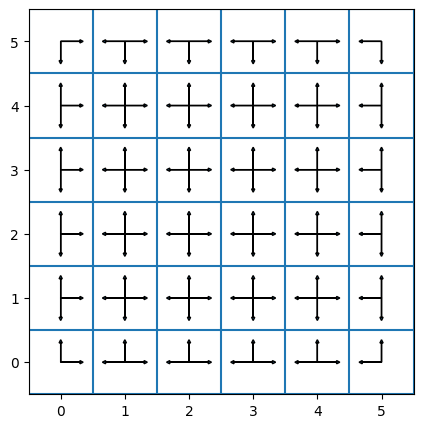

In [19]:
grid.plot_policy()

In [20]:
grid.value_iteration()

In [21]:
grid.update_policy()

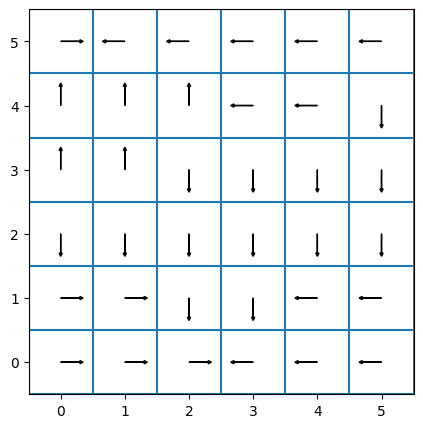

In [22]:
grid.plot_policy()

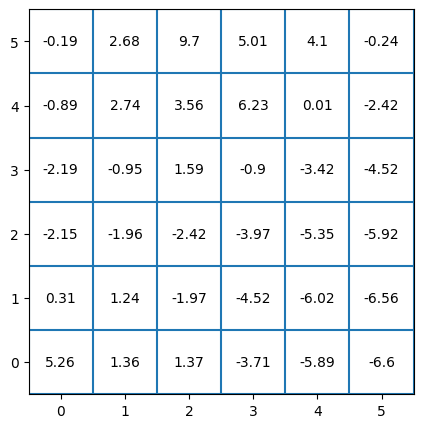

In [23]:
grid.plot_values()